In [ ]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import math
from itertools import *
from scipy.special import comb

In [ ]:
norm.cdf((2 * 50 - 1001) / np.sqrt(1001)) + (0.4784 * 0.01) / (0.5 * math.sqrt(1001))

0.00030241555652970106

In [ ]:
norm.cdf((4 * 50 - 2 - 1001) / np.sqrt(1001)) + (0.4784 * 0.125) / (0.25 * np.sqrt(1001))

0.007560388913242527

In [ ]:
def k_estimate(n, epsilon):
  lower = (np.log2(norm.cdf((2 * epsilon - n) / np.sqrt(n))) + n) * np.ones(10)
  upper = (np.log2(norm.cdf((4 * epsilon - 2 - n) / np.sqrt(n))) + n) * np.ones(10)
  return lower, upper

In [ ]:
print(k_estimate(1000, 1))

(array([275.22778745, 275.22778745, 275.22778745, 275.22778745,
       275.22778745, 275.22778745, 275.22778745, 275.22778745,
       275.22778745, 275.22778745]), array([275.22778745, 275.22778745, 275.22778745, 275.22778745,
       275.22778745, 275.22778745, 275.22778745, 275.22778745,
       275.22778745, 275.22778745]))


In [ ]:
def k_estimate_lower(n, epsilon):
  return k_estimate(n, epsilon)[0]

def k_estimate_upper(n, epsilon):
  return k_estimate(n, epsilon)[1]

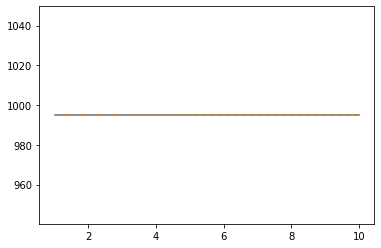

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = k_estimate_lower(1001, 50)
y2 = k_estimate_upper(1001, 50)
plt.plot(x, y1, '-', x, y2, '--')

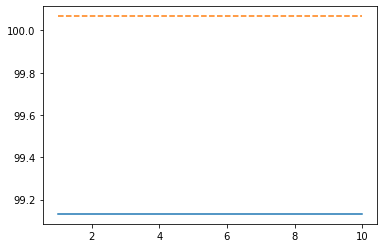

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = k_estimate_lower(100, 50)
y2 = k_estimate_upper(100, 50)
plt.plot(x, y1, '-', x, y2, '--')

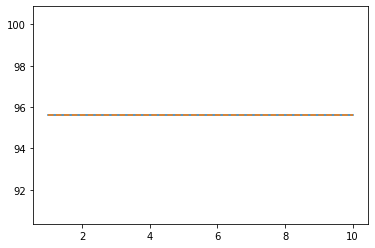

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = k_estimate_lower(100, 1)
y2 = k_estimate_upper(100, 1)
plt.plot(x, y1, '-', x, y2, '--')

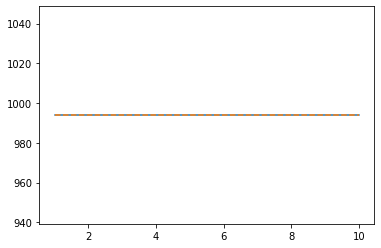

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = k_estimate_lower(1000, 1)
y2 = k_estimate_upper(1000, 1)
plt.plot(x, y1, '-', x, y2, '--')

In [ ]:
dyn_k_lower = np.zeros(500)
dyn_k_upper = np.zeros(500)
for i in range(500):
  dyn_k_lower[i] = k_estimate_lower(1000, i + 1)[0]
  dyn_k_upper[i] = k_estimate_upper(1000, i + 1)[0]

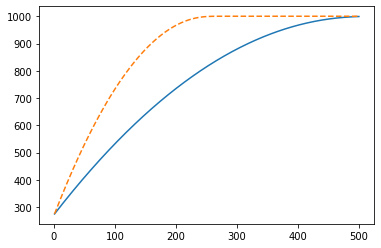

In [ ]:
x = np.arange(1, 501)
y1 = dyn_k_lower
y2 = dyn_k_upper
plt.plot(x, y1, '-', x, y2, '--')

In [ ]:
def stirling_lower(n, e):
  return np.log(e + 1) - 0.5 * np.log(2 * np.pi) + 0.5 * np.log(n) - 0.5 * np.log(n - e) - 0.5 * np.log(e) + n * entropy([e / n, (n - e) / n], base=2)

def stirling_upper(n, e):
  return - 0.5 * np.log(2 * np.pi) + 0.5 * np.log(n) - 0.5 * np.log(n - 2 * e + 1) - 0.5 * np.log(2 * e - 1) + n * entropy([(2 * e - 1) / n, (n - 2 * e + 1) / n], base=2)

In [ ]:
s_lower = np.zeros(500)
s_upper = np.zeros(500)
s_k = np.zeros(500)
for i in range(500):
  s_lower[i] = stirling_lower(1000, i + 1)
  s_upper[i] = stirling_upper(1000, i + 1)
  s_k[i] = 1000 - i - 1

In [ ]:
s_upper

array([ 10.48931945,  27.99730942,  43.69354112,  58.28406073,
        72.07535324,  85.23956422,  97.88720485, 110.09530328,
       121.9206472 , 133.40684627, 144.58844729, 155.49349567,
       166.14521396, 176.56314781, 186.76397542, 196.76209534,
       206.57006395, 216.19892756, 225.65847928, 234.95746064,
       244.1037222 , 253.104353  , 261.96578613, 270.69388556,
       279.29401838, 287.77111522, 296.12972132, 304.37403991,
       312.50796927, 320.53513469, 328.45891606, 336.2824719 ,
       344.00876031, 351.64055739, 359.18047347, 366.63096743,
       373.99435943, 381.27284231, 388.46849166, 395.58327497,
       402.61905976, 409.57762099, 416.46064768, 423.26974899,
       430.00645968, 436.67224508, 443.2685057 , 449.79658138,
       456.25775505, 462.6532563 , 468.98426458, 475.25191214,
       481.4572868 , 487.60143446, 493.68536144, 499.71003664,
       505.67639357, 511.58533222, 517.4377208 , 523.23439732,
       528.97617117, 534.66382448, 540.29811349, 545.87

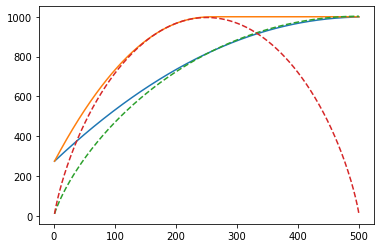

In [ ]:
x = np.arange(1, 501)
y1 = dyn_k_lower
y2 = dyn_k_upper
y3 = s_lower
y4 = s_upper
plt.plot(x, y1, '-', x, y2, '-', x, y3, '--', x, y4, '--')

In [ ]:
combin = []
combin.append(1)
for i in range(50):
  a = comb(1000, i, exact=True)
  for j in range(1, i):
      combin.append(combin[j - 1] + a)

print(combin[50])

23706860441577360572040751


In [ ]:
norm.cdf(-10 * np.sqrt(10))

8.979163924001585e-220

In [ ]:
norm.cdf(-12 * np.sqrt(10))

0.0

In [ ]:
np.log2(norm.cdf(-10 * np.sqrt(10)))

-727.6575997575196

In [ ]:
-220 * np.log2(10) + np.log2(8.979163924001585)

-727.6575997575195

In [ ]:
np.log2(101)

6.658211482751795